# Load Library

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load and Split data

In [2]:
# Load dataset
dataset = read_csv("D:/Academy/thesis/machin learning part/data/inputML.csv")
dataset.set_index('name', inplace=True)
dataset['stage'].replace({'brain lower grade glioma':False, 'glioblastoma multiforme':True}, inplace=True)
dataset[dataset.select_dtypes(['object']).columns] = dataset.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(dataset.shape)

(702, 5)


In [3]:
# import random
# from random import randint
# dataset = read_csv("D:/Academy/thesis/machin learning part/data/all_inputML.csv")
# col = range(1,20530)
# sub_col = random.sample(col,4)
# print(sub_col)

In [4]:
# Split dataset
X = dataset.drop('stage', axis=1)
y = dataset['stage']
x_main, x_test, y_main, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=0.20, random_state=1, stratify=y_main)
# summarize
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)
print('Validation', x_val.shape, y_val.shape)

Train (448, 4) (448,)
Test (141, 4) (141,)
Validation (113, 4) (113,)


In [5]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))
print(Counter(y_val))

Counter({False: 339, True: 109})
Counter({False: 106, True: 35})
Counter({False: 85, True: 28})


# Apply SMOTE

In [6]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
print(Counter(y_train))

Counter({False: 339, True: 339})


In [5]:
print(Counter(y_train))

Counter({False: 339, True: 109})


# Fitting some Models without  Hyperparameter Tuning

In [14]:
# Fitting Model
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from scipy.stats import loguniform

# KNN
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=12, metric='minkowski', p=2) 
knn.fit(x_train, y_train) 


# Decision Tree
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5) 
dtc = dtc.fit(x_train, y_train) 


# SVM
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm = svm.fit(x_train, y_train) 

# Linear SVM
lsvm = LinearSVC(dual=False, random_state=13)
lsvm = lsvm.fit(x_train, y_train) 


# Logestic regression
LR = LogisticRegression(solver='liblinear')
LR = LR.fit(x_train, y_train)

#RFE
rfe = RFE(estimator=DecisionTreeClassifier())
rfe = rfe.fit(x_train, y_train)     

# XGB
xgb = XGBClassifier(tree_method="hist")
xgb = xgb.fit(x_train, y_train) 

# Ensemble
#lr_xgb_rf = VotingClassifier(estimators=[('xgb', xgb), ('svm', svm), ('knn',knn)],voting='hard')
#lr_xgb_rf = lr_xgb_rf.fit(x_train, y_train) 
#----
# Compare Model

# Compare different Classifiers

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
models = []
models.append(('LR', LR))
models.append(('KNN', knn))
models.append(('DTC', dtc))
models.append(('SVM', svm))
models.append(('LSVM', lsvm))
models.append(('RFE',rfe))
models.append(('XGB', xgb))


print(models)

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')#f1
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


[('LR', LogisticRegression(solver='liblinear')), ('KNN', RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc')), ('DTC', DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)), ('SVM', RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   scoring='roc_auc')), ('LSVM', LinearSVC(dual=False, random_state=13)), ('RFE', RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
  

C:\Users\Fallah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Fallah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fallah\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\Fallah\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Fallah\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 109, in __get__
    if not self.check(obj):
  File "C:\Users\Fallah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 373, in 

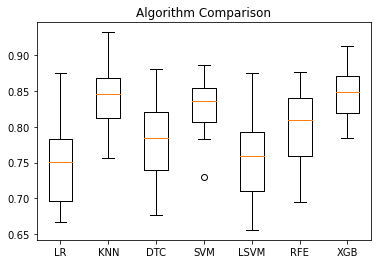

In [10]:
# Compare Algorithms
# import matplotlib. pyplot as plt 
# plt.boxplot(results, labels=names)
# plt.title('Algorithm Comparison')
# plt.show()

# Model Evaluation on Test  set

In [8]:
Y_knn = random_knn.predict(x_test) 
Y_dtc = dtc.predict(x_test) 
Y_svm = random_svm.predict(x_test) 
Y_lr = LR.predict(x_test) 
Y_lsvm = lsvm.predict(x_test) 
Y_rfe = random_rf.predict(x_test) 
Y_xgb = random_xgb.predict(x_test) 

# Evaluate predictions 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy KNN: %.2f' % (roc_auc_score(y_test, Y_knn)*100))
print('Accuracy DT: %.2f' % (f1_score(y_test, Y_dtc)*100))
print('Accuracy SVM: %.2f' % (f1_score(y_test, Y_svm)*100))
print('Accuracy LR: %.2f' % (f1_score(y_test, Y_lr)*100))
print('Accuracy LSVM: %.2f' % (f1_score(y_test, Y_lsvm)*100))
print('Accuracy RFE: %.2f' % (f1_score(y_test, Y_rfe)*100))
print('F1 XGB: %.2f' % (f1_score(y_test, Y_xgb)*100))
print('Accuracy XGB: %.2f' % (accuracy_score(y_test, Y_xgb)*100))
print(confusion_matrix(y_test, Y_knn))
print(classification_report(y_test, Y_knn))
#accuracy_score

Accuracy KNN: 66.20
Accuracy DT: 48.98
Accuracy SVM: 53.85
Accuracy LR: 48.98
Accuracy LSVM: 45.83
Accuracy RFE: 57.69
F1 XGB: 60.38
Accuracy XGB: 85.11
[[104   2]
 [ 23  12]]
              precision    recall  f1-score   support

       False       0.82      0.98      0.89       106
        True       0.86      0.34      0.49        35

    accuracy                           0.82       141
   macro avg       0.84      0.66      0.69       141
weighted avg       0.83      0.82      0.79       141



# Model Evaluation on Validation set

In [9]:
Y_knn_val = random_knn.predict(x_val) 
Y_dtc_val = dtc.predict(x_val) 
Y_svm_val = random_svm.predict(x_val) 
Y_lr_val = LR.predict(x_val) 
Y_lsvm_val = lsvm.predict(x_val) 
Y_rfe_val = random_rf.predict(x_val) 
Y_xgb_val = random_xgb.predict(x_val) 


# Evaluate predictions 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy KNN: %.2f' % (f1_score(y_val, Y_knn_val)*100))
print('Accuracy DT: %.2f' % (f1_score(y_val, Y_dtc_val)*100))
print('Accuracy SVM: %.2f' % (f1_score(y_val, Y_svm_val)*100))
print('Accuracy LR: %.2f' % (f1_score(y_val, Y_lr_val)*100))
print('Accuracy LSVM: %.2f' % (f1_score(y_val, Y_lsvm_val)*100))
print('Accuracy RFE: %.2f' % (f1_score(y_val, Y_rfe_val)*100))
print('F1 XGB: %.2f' % (f1_score(y_val, Y_xgb_val)*100))
print('Accuracy XGB: %.2f' % (accuracy_score(y_val, Y_xgb_val)*100))


#print(confusion_matrix(y_test, Y_knn))
#print(classification_report(y_test, Y_svm))

Accuracy KNN: 45.00
Accuracy DT: 33.33
Accuracy SVM: 39.02
Accuracy LR: 40.00
Accuracy LSVM: 40.00
Accuracy RFE: 39.02
F1 XGB: 43.90
Accuracy XGB: 79.65
